## **Notebook Overview**
- KMeans Clustering is a very simple, but powerful machine learning algorithm in Data Science
- It is extensively used to identify data with similiar characteristics in the Financial Sector 
- It is very easy to understand and implement using the Python Programming Language

This Tutorial will provide information regarding the KMeans algorithm, as well as a practical walkthrough of how to implement it directly on some Banking Sector Data

### **Cluster Properties**

2 Main Properties to understand:
1) Data in a cluster should be similar to each other
2) Data from different clusters should be as different as possible.

Below, we will examine some banking data and see how clustering, when applied properly, can help identify common characteristics in the data.
For the purpose of our very simple overview, we will say that the bank only wants to use income and debt to make a segmentation. 
They collected the customer data and used a scatter plot to visualize it 

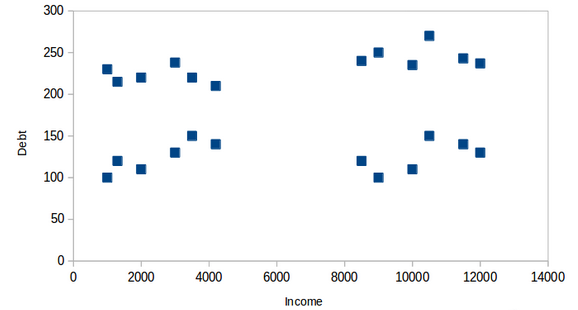

By applying KMeans Clustering to this kind of data, we can accurately determine that they belong to unique groups, determined by similiar characteristics

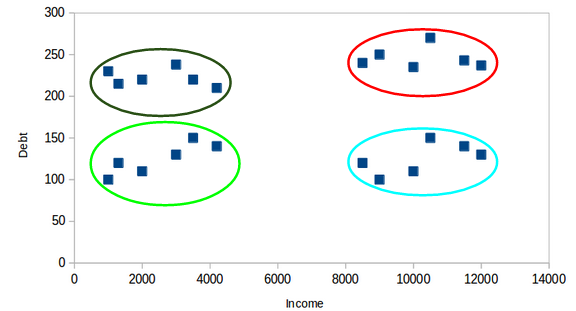

With this basic understanding, let's dive into a practical implementation using Python and a few of its associated libraries to perform this type of customer segmentation on Credit Risk Data from the [Popular German Credit Risk Dataset](https://www.kaggle.com/uciml/german-credit "Free Download from Kaggle")

### **Scope of Problem: Cluster Customers Based on Credit Risk Factors**

Firstly, let's utilize Python's built-in capabilities to utilize various tools. These tools are used and referred to as "Libraries" and are accessed through importing them into the Python instance that is currently being run

In [1]:
# This library allows us to manipulate data,
# similiarly to how we manipulate data in Excel
import pandas as pd
import numpy as np

# Sklearn libraries are used to implement Machine Learning Algorithms
# Such as Clustering and Data Scaling
from sklearn.cluster import KMeans

# Matplotlib is a library used to build visuals and graphs from data
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Ignore Basic Warnings generated from non-technical Code implementations in this tutorial
import warnings
warnings.filterwarnings('ignore')

Now that we have imported the necessary tools, we need to load our dataset that we've downloaded from Kaggle so that we may begin some analysis

The dataset that we will be examining has certain feature data in its content that we must define for better clarity. The information is available below:

 - Age (numeric)
 - Sex (text: male, female)
 - Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
 - Housing (text: own, rent, or free)
 - Saving accounts (text - little, moderate, quite rich, rich)
 - Checking account (numeric, in DM - Deutsch Mark)
 - Credit amount (numeric, in DM)
 - Duration (numeric, in month)
 - Purpose(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others

In [29]:
# Load CSV file into Pandas DataFrame format
df = pd.read_csv('german_credit_data.csv',index_col=0)

# View Loaded Data
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


#### **Let's Examine the Data**

- Null or Empty Numbers
- Unique values

In [30]:
# Search for Missing values,data type and shape/size of data
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
dtypes: int64(4), object(5)
memory usage: 78.1+ KB
None


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


In [31]:
# Examine total number of Unique values across each column
print(df.nunique())
df

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


### **Basic Data Cleaning**

In the above initial examination of our data, we saw that there are many unique values that belong to each feature(column) presented.

In order to perform KMeans clustering, there are a few steps that must be applied to our data so that the algorithm can be run properly. They are:

- Null Value Replacement/Cleaning
- Data Encoding (Conversion of Text data into Numeric data type)

We will walk through each of these, some in less detail than others for the purpose of keeping things simple to start.

### **Null Value Replacement/Cleaning**

1) Identify columns & rows with Empty values that will cause distortions in the data
2) Either Remove or Replace the Empty Values depending on specific factors 

In [32]:
# Find any columns with Empty Values or NaN values
df.isna().sum()
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV


For the purpose of this tutorial, we will simply drop any columns with NaN or Empty Values.

In reality, we would try to avoid dropping rows of our data unless the number to be dropped is relatively low in regards to the total amount od available data.

In [33]:
# Drop all rows from DataFrame with Empty values / NaN values
df = df.dropna()
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,female,2,own,little,moderate,5951,48,radio/TV
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car
7,35,male,3,rent,little,moderate,6948,36,car
9,28,male,3,own,little,moderate,5234,30,car
...,...,...,...,...,...,...,...,...,...
989,48,male,1,own,little,moderate,1743,24,radio/TV
993,30,male,3,own,little,little,3959,36,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
998,23,male,2,free,little,little,1845,45,radio/TV


In [22]:
# Check if operation was successful
df.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

### **Data Encoding(Conversion of Text data into Numeric data type)**

In this portion, we need to examine the data that we have that is not in a numeric format. 

Our Algorithm will only be able to perform on Numerical data and as such, we have to find a way to transform our data from e text-based format into a numerical format.\
To achieve this, we apply a method known as "Label Encoding" which takes a categorical column of values in a DataFrame and assigns a unique integer value for each unique value presented

**This could look like this for the 'Purpose' Column (8 different unique possible values):**

radio/TV            --> 0\
furniture/equipment --> 1\
car                 --> 2\
business            --> 3\
domestic appliances --> 4\
repairs             --> 5\
vacation/others     --> 6\
education           --> 7

In [35]:
# Apply One-Hot Encoding to Categorical data
categorical_columns = ['Sex','Housing','Saving accounts','Checking account','Purpose']
df[categorical_columns] = df[categorical_columns].astype('category')

# Loop through each Column in the DataFrame and change the data from text format to a unique numerical integer
for col in categorical_columns:
    df[col] = df[col].cat.codes
    
# View modified DataFrame
df.head(30)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
1,22,0,2,1,0,1,5951,48,5
3,45,1,2,0,0,0,7882,42,4
4,53,1,2,0,0,0,4870,24,1
7,35,1,3,2,0,1,6948,36,1
9,28,1,3,1,0,1,5234,30,1
10,25,0,2,2,0,1,1295,12,1
11,24,0,2,2,0,0,4308,48,0
12,22,0,2,1,0,1,1567,12,5
13,60,1,1,1,0,0,1199,24,1
14,28,0,2,2,0,0,1403,15,1


## Elbow Chart for Determining K Value

The next step now that we have successfully adjusted our data into numeric formats is to identify an appropriate value for K in the KMeans algorithm. We determine this by plotting an Elbow Chart and selecting the value for K that best flattens the graph. I.e. where the graph begins to smooth out along the x-axis

In [10]:
# Function to plot Elbow Plot using Kmeans Algorithm

def plot_inertia(df,min_cluster,max_cluster):
    
    inertia = []
    for i in range(min_cluster, max_cluster):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                   random_state=2022)
        km.fit(df)
        inertia.append(km.inertia_)
        
    fig, ax = plt.subplots(figsize=(15,8))
    ax.plot(range(min_cluster,max_cluster), inertia, marker='o')
    ax.set_xlabel('Number of Clusters')
    ax.set_ylabel('Distortion')
    ax.set_title('Elbow method')
    plt.show()

We need to select the range of clusters to analyze in order to evaluate which number of clusters is the best, based on the data we are analyzing.\
Therefore, we have to specify a starting value and a maximum value.\
For this example, we definitely want the data to be broken up into more than 1 cluster, so we set the Minimum number of clusters to 2, while we don't want too much customer segmentation to occur. We set the Maximum cluster number to 8.\
Anything beyond that becomes indecipherable.

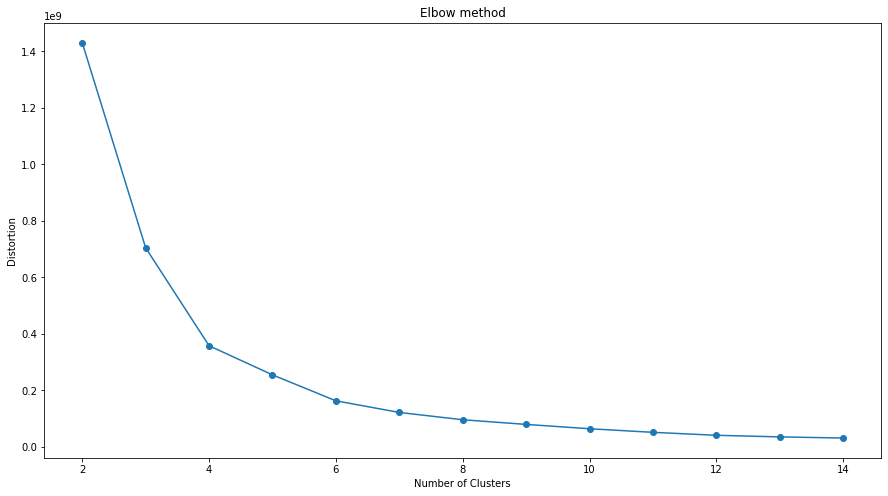

In [12]:
plot_inertia(df=df,
             min_cluster=2,
             max_cluster=15)

From the above Elbow chart, we can say that the best values for K are either 3 or 4 Clusters to sort the data into.\

The defining decline between values is at 4 Clusters so let's use the KMeans algorithm to sort the data into this number of distinct groups.

We will set the KMeans Algorithm's K value to 4 and then train the model on the data. Once it has examined the data, we will then have it predict or assign each row in the data (I.e., each applicant) to a specific cluster. 

In [14]:
# Now let's see which rows of our dataframe were included in which cluster. 
# For this we will add another column in our dataframe (df)
df['Cluster'] = KMeans(n_clusters=20).fit_predict(df)

In [15]:
# Let's see how many applicants have been sorted into each cluster
df['Cluster'].value_counts()

2     134
14    133
18    109
5      97
7      91
11     88
0      68
17     56
12     36
1      33
10     33
19     27
3      23
6      16
16     16
4      14
15     13
9       8
13      4
8       1
Name: Cluster, dtype: int64

From here on, if we wanted to dive deeper into analysis, we are very well positioned as we could very quickly separate and sort the data by assigned cluster. This cluster analysis gives us an idea of which rows of our dataframe lie in which cluster. Here we have 4 clusters and if you are thinking about naming these clusters then we need a subject matter expert (SME) who can create them as it is subjective.

This is the primary purpose of KMeans Clustering, as it is most often used to segment the data for either further analysis or in order to separate the data so that additional operations can be applied to specific segments

## Visualizing Clusters on Radar Plot

So to understand this visualization you need to understand the context. Clusters are a combination of all the columns / features of our dataframe.\
To visualize those clusters on 2D-axis is not a good idea as 2D-axis will mean choosing 2 features from our df and we don't want to play favorites.\
So we choose a radar plot where all the features of our df that were used to create clusters are on the circumference and the "stretch" of the clusters shows which feature impacts the most to which cluster. [Read more about interpreting radar plots here](https://www.fusioncharts.com/resources/chart-primers/radar-chart "About Radar Charts")

In [16]:
# Function to Plot Radar Chart from passed DataFrame

def plot_radar_chart(df):
    data = []
    for i in range(0,len(df)):
        data.append(go.Scatterpolar(r = df.iloc[i].values,
                                    theta = df.iloc[i].index,
                                    name = f'cluster_{df.index[i]}',
                                    fill = 'toself'))
    # mean line
    data.append(go.Scatterpolar(r = [100]* df.shape[1],
                                theta= df.columns,
                                name = 'mean',
                                fill = 'toself'))
    layout = go.Layout(polar = dict(radialaxis = dict(visible = True)),
                       showlegend = True)
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [17]:
# data to radar chart
df_radar = df.groupby('Cluster').mean().divide(df.drop('Cluster',axis=1).mean())*100

plot_radar_chart(df_radar)

Here we have seen just a very simplified example of applying the KMeans Clustering Algorithm to some banking data. It is by far, a simple yet powerful Unsupervised Learning tool that can give incredible insights into trends, characteristics and behaviours of Customers and Data.